In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

c:\Users\1kate\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.info()
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
601297,Data Analyst,Full Time Data Analyst,"Portage, MI",via BeBee,Full-time,False,"Illinois, United States",2023-11-06 09:01:25,False,False,United States,None,NaN,NaN,LifePoint Health,"['sql', 'word', 'excel', 'powerpoint']","{'analyst_tools': ['word', 'excel', 'powerpoin..."
284696,Data Scientist,Head of Data/AI - Digital Experience,"Tokyo, Japan",via Careers At Cognizant,Full-time,False,Japan,2023-03-10 07:41:20,False,False,Japan,None,NaN,NaN,"Cognizant Japan K.K, Cognizant Technology Solu...",None,None
262639,Senior Data Engineer,"Senior Principal Solutions Engineer, Data Anal...","St Joseph, MO",via WANE Jobs,Full-time,False,Sudan,2023-03-10 07:42:56,False,False,Sudan,None,NaN,NaN,Boehringer Ingelheim,"['c#', 'sql', 'go', 'javascript', 'nosql', 'sa...","{'analyst_tools': ['sas'], 'databases': ['mong..."


In [3]:
df.sample(3)
jobs_analyzed = df['job_title_short'].value_counts().head(3)
jobs_analyzed = jobs_analyzed.index.to_list()
jobs_analyzed


['Data Analyst', 'Data Engineer', 'Data Scientist']

In [4]:
data = df[df["job_title_short"].isin(jobs_analyzed)]
data = data[["job_title_short","job_skills"]]
data = data[data['job_skills'].notna()]
data

,job_title_short,job_skills
1,Data Analyst,"['r', 'python', 'sql', 'nosql', 'power bi', 't..."
2,Data Engineer,"['python', 'sql', 'c#', 'azure', 'airflow', 'd..."
3,Data Engineer,"['python', 'c++', 'java', 'matlab', 'aws', 'te..."
4,Data Engineer,"['bash', 'python', 'oracle', 'aws', 'ansible',..."
5,Data Engineer,"['python', 'sql', 'gcp']"
...,...,...
785730,Data Engineer,"['excel', 'word', 'outlook']"
785731,Data Engineer,"['nosql', 'mongodb', 'mongodb', 'python', 'ela..."
785732,Data Engineer,"['python', 'c#', 'java', 'scala', 'sql', 'post..."
785737,Data Analyst,"['sas', 'sas', 'sql', 'excel']"


In [5]:
job_count_total = data['job_title_short'].value_counts()
job_count_total = job_count_total.to_frame()
job_count_total

,count
job_title_short,
Data Engineer,169362
Data Analyst,159394
Data Scientist,145807


In [6]:
def skill_cleanup(job_skills):
    if pd.notna(job_skills):
        return ast.literal_eval(job_skills)
    return job_skills
   
data["job_skills"] = data["job_skills"].apply(skill_cleanup)
data = data.explode("job_skills")
data

,job_title_short,job_skills
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
1,Data Analyst,power bi
...,...,...
785739,Data Engineer,spark
785739,Data Engineer,hadoop
785739,Data Engineer,kafka
785739,Data Engineer,kubernetes


In [7]:
job_skills_count = data.groupby(["job_title_short", "job_skills"]).size().reset_index(name="skill_count")
job_skills_count["job_count_total"] = job_skills_count["job_title_short"].map(job_count_total["count"])
job_skills_count['skill_percentage'] = (job_skills_count['skill_count'] / job_skills_count['job_count_total']) * 100

job_skills_count = job_skills_count.sort_values(by="skill_count", ascending=False)
job_skills_count

,job_title_short,job_skills,skill_count,job_count_total,skill_percentage
630,Data Scientist,python,113711,145807,77.987339
429,Data Engineer,sql,113130,169362,66.797747
394,Data Engineer,python,108022,169362,63.781722
189,Data Analyst,sql,92428,159394,57.987126
665,Data Scientist,sql,78982,145807,54.168867
...,...,...,...,...,...
606,Data Scientist,nuxt.js,1,145807,0.000686
655,Data Scientist,shogun,1,145807,0.000686
195,Data Analyst,suse,1,159394,0.000627
261,Data Engineer,chainer,1,169362,0.000590


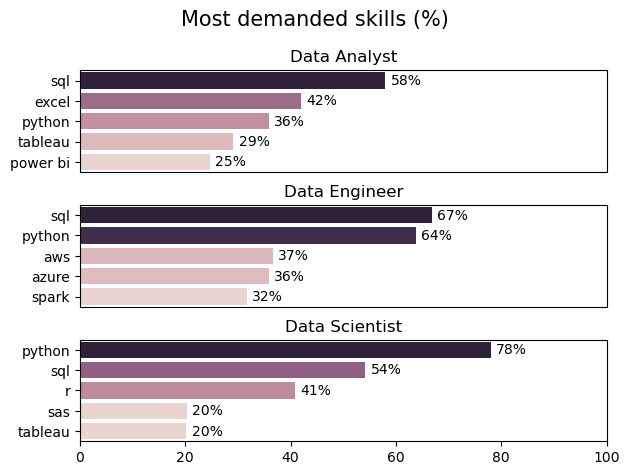

In [22]:
fig, ax = plt.subplots(len(jobs_analyzed), 1)

for index, job in enumerate(jobs_analyzed):
    single_job_percentage = job_skills_count[job_skills_count['job_title_short'] == job].head(5)
    sns.barplot(data=single_job_percentage, x='skill_percentage', y='job_skills', ax=ax[index], hue='skill_count')
    ax[index].set_title(job)
    ax[index].set_ylabel('')
    ax[index].set_xlabel('')
    ax[index].get_legend().remove()
    ax[index].set_xlim(0, 100)

    if index != len(jobs_analyzed) - 1:
        ax[index].set_xticks([])

    for n, v in enumerate(single_job_percentage['skill_percentage']):
        ax[index].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Most demanded skills (%)', fontsize=15)
fig.tight_layout(h_pad=.9)
plt.show()

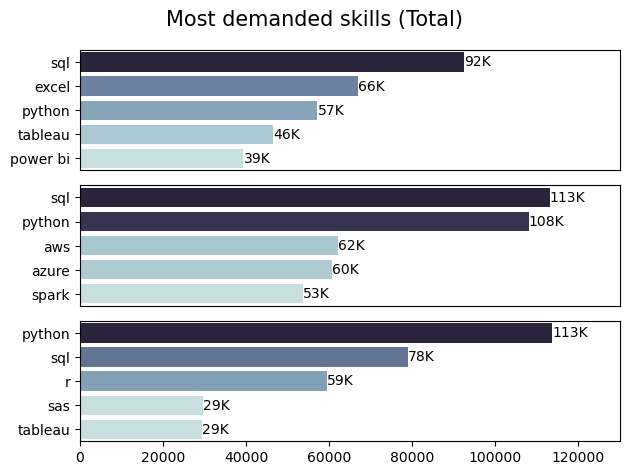

In [21]:
fig, ax = plt.subplots(len(jobs_analyzed), 1)

custom_palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

for index, job in enumerate(jobs_analyzed):
    single_job_count = job_skills_count[job_skills_count['job_title_short'] == job].head(5)

    sns.barplot(data=single_job_count, x='skill_count', y='job_skills', ax=ax[index], hue='skill_count', palette= custom_palette)
    ax[index].set_ylabel('')
    ax[index].set_xlabel('')
    ax[index].set_xlim(0, 130000)
    ax[index].get_legend().remove()
    
    if index != len(jobs_analyzed) - 1:
        ax[index].set_xticks([])

    for n, v in enumerate(single_job_count['skill_count']):
        ax[index].text(v + 1, n, f'{int(v/1000)}K', va='center')

fig.suptitle('Most demanded skills (Total)', fontsize=15)
fig.tight_layout()

plt.show()
